In [1]:
import pandas as pd

In [2]:
reviews_df = pd.read_csv("reviews_preproc.csv")
reviews_df = reviews_df.drop('Unnamed: 0', axis=1)
reviews_df = reviews_df.dropna()
reviews_df

,Valoración,Publicado hace,Comentario,Fecha,Región,Texto Preprocesado,StopWords
0,5,9 months ago,just had an excellent menu del dia here qualit...,2022-01-03,Andalucía,excel menu del qualiti ingredi home cook good ...,excellent menu del quality ingredients home co...
1,5,2 years ago,really enjoyed the food and atmosphere we real...,2020-03-08,Andalucía,realli enjoy food atmospher realli appreci pab...,really enjoyed food atmosphere really apprecia...
2,5,a year ago,amazing tapas in at the skirts of sierra nevada,2021-06-20,Andalucía,amaz tapa skirt sierra nevada,amazing tapas skirts sierra nevada
3,3,a month ago,it is on the way to almería which makes it an ...,2022-08-22,Andalucía,way alberta make ideal stopov food fine order ...,way alberta makes ideal stopover food fine ord...
4,1,a month ago,staff with little desire to work especially th...,2022-08-10,Andalucía,staff littl desir work especi guy monday noon ...,staff little desire work especially guy monday...
...,...,...,...,...,...,...,...
383367,2,3 months ago,we went because the reviews of the restaurant ...,2022-06-21,La Rioja,went review restaur seem good choic correct st...,went reviews restaurant seemed good choice cor...
383368,5,3 months ago,one returns to the place where he was happy sp...,2022-06-11,La Rioja,one return place happi spectacular delici,one returns place happy spectacular delicious
383369,5,3 months ago,excellent lunch menu homemade and quality food...,2022-06-08,La Rioja,excel lunch menu homemad qualiti food kind ser...,excellent lunch menu homemade quality food kin...
383370,5,3 months ago,good music good atmosphere good views very com...,2022-06-12,La Rioja,good music good atmospher good view comfort,good music good atmosphere good views comfortable


# Wordcloud

In [3]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
text = " ".join(review for review in reviews_df.StopWords)

In [5]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [6]:
def makeImage(text):

    wc = WordCloud(collocations=False, background_color= 'white')
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [7]:
dictio = getFrequencyDictForText(text)

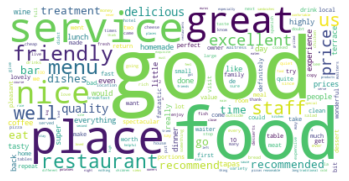

In [8]:
makeImage(dictio)

In [9]:
from collections import Counter

topDictio = dict(Counter(dictio).most_common(10))

In [26]:
topDictio

{'good': 219673,
 'food': 145532,
 'place': 105155,
 'service': 87757,
 'great': 86757,
 'nice': 59025,
 'friendly': 53215,
 'menu': 53142,
 'restaurant': 50965,
 'us': 47751}

# Bubble Chart

In [17]:
# Class available from https://matplotlib.org/3.5.0/gallery/misc/packed_bubbles.html
import numpy as np

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):

        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):

        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

In [29]:
data = {
    'bigrams': list(topDictio.keys()),

    'frequency': list(topDictio.values()),

    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green']
}

In [30]:
bubble_chart = BubbleChart(area=data['frequency'],
                           bubble_spacing=0.1)
bubble_chart.collapse()

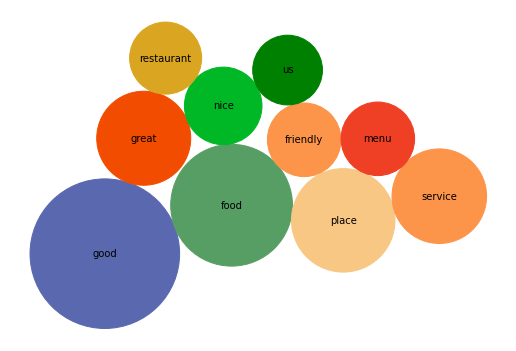

In [31]:
# Display the image
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, data['bigrams'], data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
# plt.savefig('bubble_chart_small.png',dpi=1500, bbox_inches='tight')
plt.show()